In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------------- -------------------------- 3.1/9.6 MB 18.5 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 18.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 17.7 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [3]:
import pandas as pd

pd.options.display.max_columns = None
bank = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Banking\bank.csv")
bank


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:


# shape of data
bank.shape



(4521, 17)

In [7]:
bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [8]:
col = ['default','housing','loan','y']

# function definition
def convert(x):
    return x.map({'yes':1,'no':0})

# calling the function
bank[col] = bank[col].apply(convert)

In [9]:


bank.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [11]:
bank['job'].astype("category").value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [12]:
bank['marital'].astype("category").value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [13]:
bank['education'].astype("category").value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [14]:

bank['contact'].astype("category").value_counts()



contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

In [15]:
bank['month'].astype("category").value_counts()

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

In [16]:
bank['poutcome'].astype("category").value_counts()

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

In [17]:


categorical = bank.select_dtypes(include=['object'])
categorical.head()



,job,marital,education,contact,month,poutcome
0,unemployed,married,primary,cellular,oct,unknown
1,services,married,secondary,cellular,may,failure
2,management,single,tertiary,cellular,apr,failure
3,management,married,tertiary,unknown,jun,unknown
4,blue-collar,married,secondary,unknown,may,unknown


In [18]:
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [19]:
bank = pd.concat([bank,dummies],axis=1)
bank.drop(columns=categorical.columns,axis=1,inplace=True)

In [20]:


bank.head()



,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,33,0,4789,1,1,11,220,1,339,4,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,35,0,1350,1,0,16,185,1,330,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,30,0,1476,1,1,3,199,4,-1,0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,59,0,0,1,0,5,226,1,-1,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [21]:


bank.shape



(4521, 43)

In [22]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   default              4521 non-null   int64
 2   balance              4521 non-null   int64
 3   housing              4521 non-null   int64
 4   loan                 4521 non-null   int64
 5   day                  4521 non-null   int64
 6   duration             4521 non-null   int64
 7   campaign             4521 non-null   int64
 8   pdays                4521 non-null   int64
 9   previous             4521 non-null   int64
 10  y                    4521 non-null   int64
 11  job_blue-collar      4521 non-null   bool 
 12  job_entrepreneur     4521 non-null   bool 
 13  job_housemaid        4521 non-null   bool 
 14  job_management       4521 non-null   bool 
 15  job_retired          4521 non-null   bool 
 16  job_self-employed    452

In [23]:
check_out = bank[['age','balance','day','duration','campaign','pdays','previous']]
check_out.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [24]:
check_out.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
90%,56.000000,3913.000000,28.000000,579.000000,6.000000,183.000000,2.000000
95%,59.000000,6102.000000,30.000000,763.000000,8.000000,317.000000,3.000000
99%,72.000000,14194.600000,31.000000,1259.000000,16.000000,370.000000,8.000000


<Axes: ylabel='previous'>

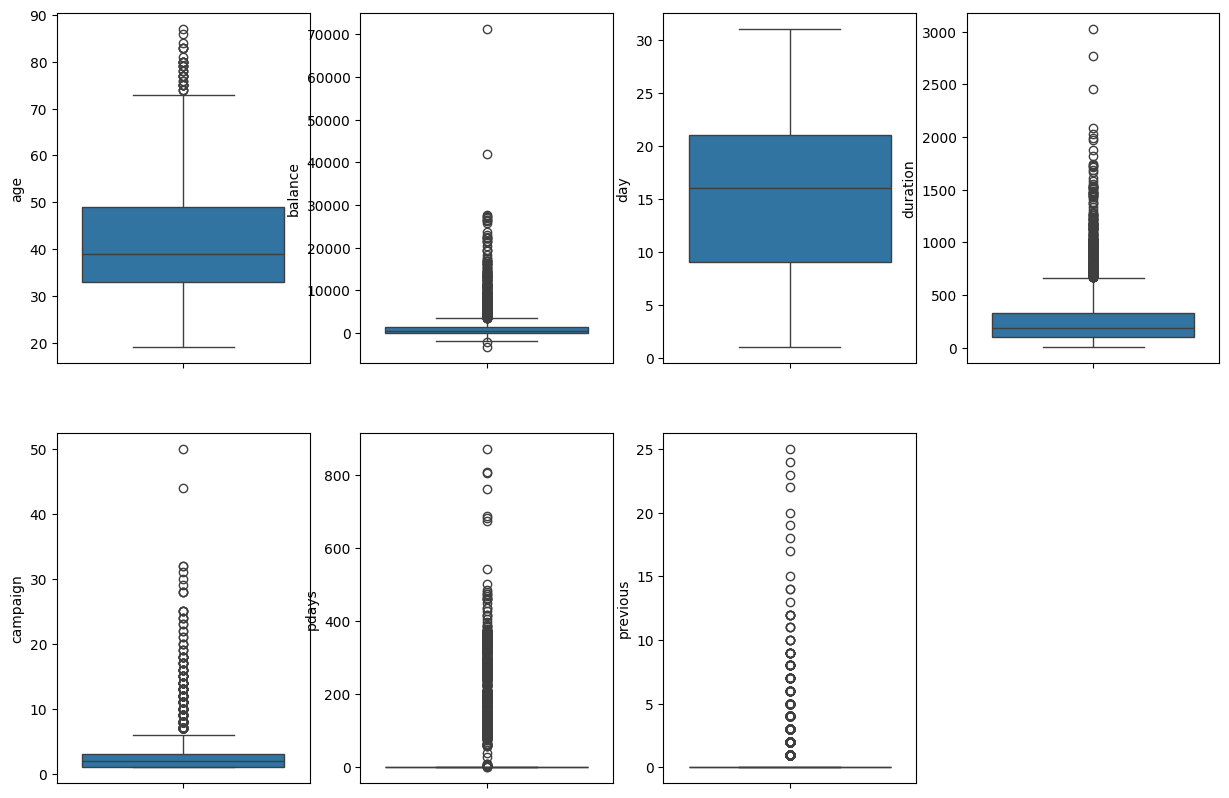

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=bank)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=bank)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=bank)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=bank)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=bank)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=bank)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=bank)

<Axes: >

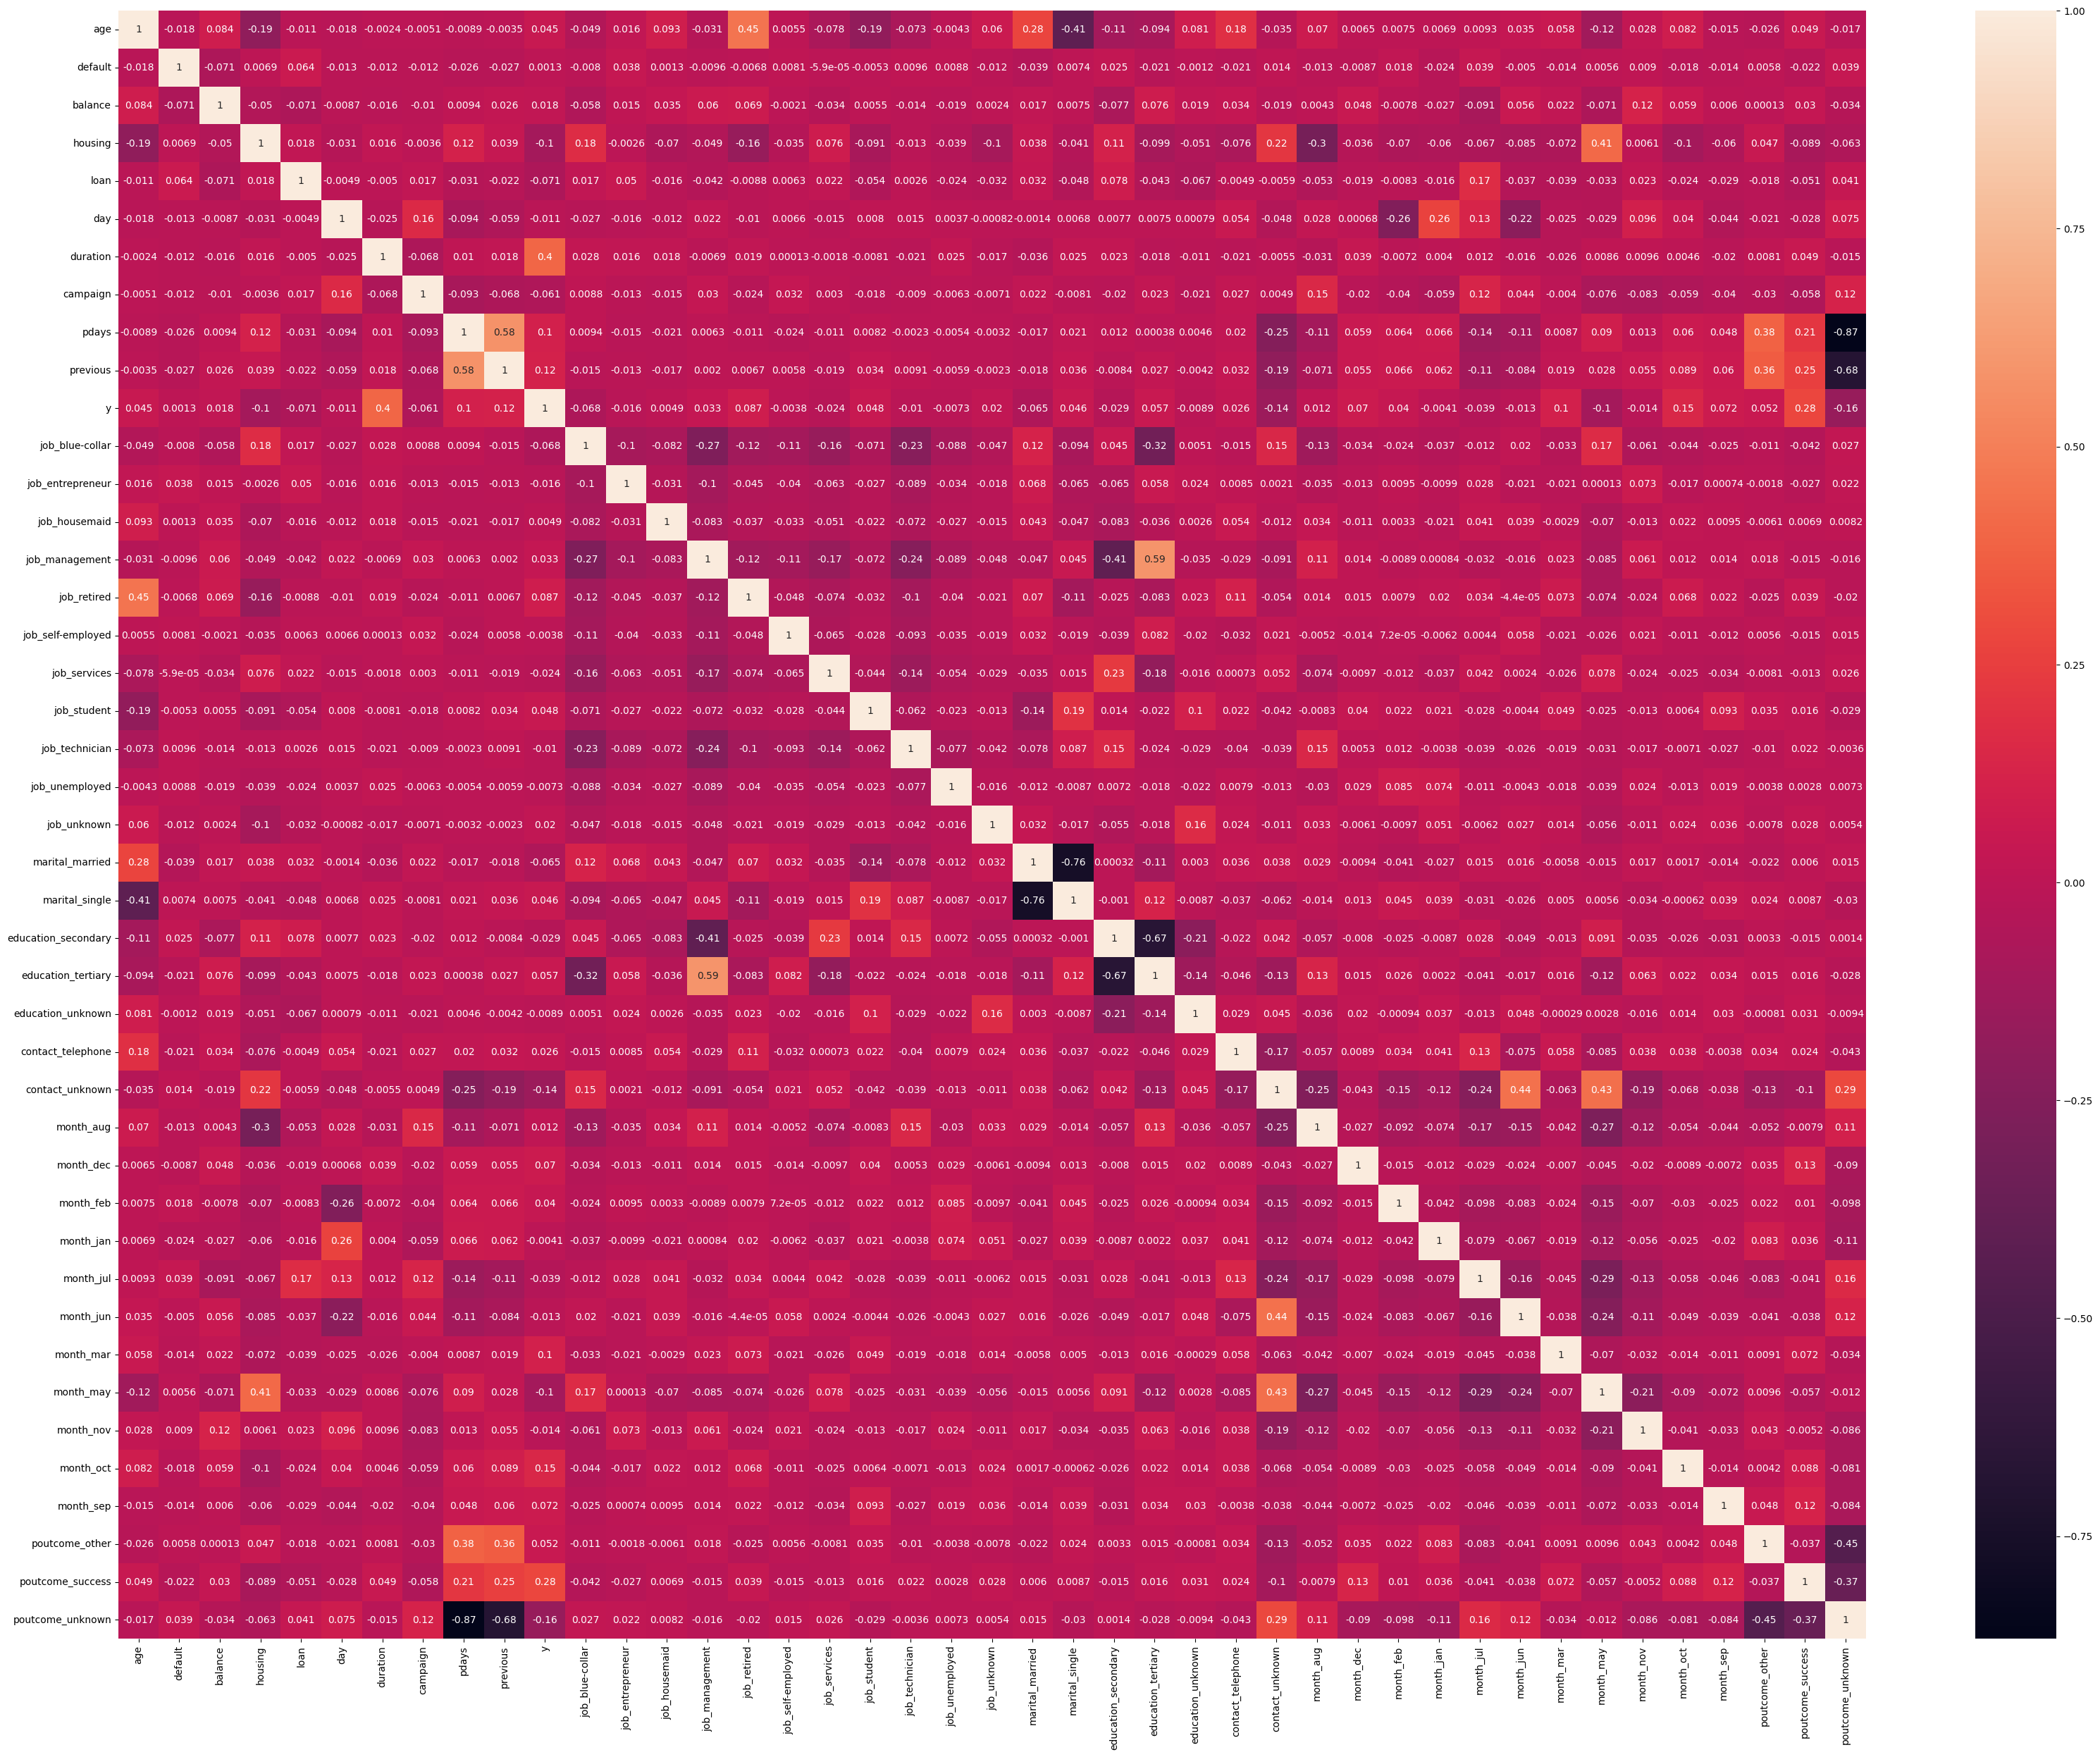

In [27]:
plt.figure(figsize=(40,30))
sns.heatmap(bank.corr(),annot=True)

In [28]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,33,0,4789,1,1,11,220,1,339,4,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,35,0,1350,1,0,16,185,1,330,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,30,0,1476,1,1,3,199,4,-1,0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,59,0,0,1,0,5,226,1,-1,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [29]:
round((sum(bank['y'])/len(bank.index))*100,2)

11.52

In [31]:

X = bank.drop('y', axis=1)
Y = bank['y']




In [32]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,33,0,4789,1,1,11,220,1,339,4,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,35,0,1350,1,0,16,185,1,330,1,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,30,0,1476,1,1,3,199,4,-1,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,59,0,0,1,0,5,226,1,-1,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [33]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)


In [42]:
x_train_encoded = pd.get_dummies(x_train, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, drop_first=True)

In [38]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

x_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_train[['age','balance','day','duration','campaign','pdays','previous']])

In [39]:


x_train.head()



,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
2085,-0.781696,0,-0.490292,1,0,1.447256,-0.427557,0.045752,-0.402013,-0.318746,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1239,-1.259091,0,0.905722,1,1,-1.323076,-0.225129,-0.258364,-0.402013,-0.318746,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
130,-0.017865,0,-0.410863,1,0,0.242764,-0.292605,0.045752,-0.402013,-0.318746,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2345,-1.450049,0,-0.299337,1,1,1.688155,-0.221381,0.653984,2.002237,1.486467,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1296,1.605278,0,-0.464680,0,0,0.001865,1.570479,-0.562480,-0.402013,-0.318746,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [45]:
x_train.dtypes[x_train.dtypes == "object"]


Series([], dtype: object)

In [ ]:
x_train.dtypes[x_train.dtypes == "object"]


Series([], dtype: object)

In [46]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

# Align columns (very important)
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

# Force all columns to float
x_train = x_train.astype(float)
x_test = x_test.astype(float)


In [47]:
y_train = y_train.astype(int)


In [48]:
import statsmodels.api as sm

logm = sm.GLM(y_train, sm.add_constant(x_train), family=sm.families.Binomial())
result = logm.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3121
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -787.24
Date:                Fri, 25 Jul 2025   Deviance:                       1574.5
Time:                        15:46:56   Pearson chi2:                 3.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2097
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1722    

In [50]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()

In [54]:
print(x_train.dtypes.unique())    # Should show only float64 or int64
print(x_train.shape, y_train.shape)  # Should match row count


[dtype('float64')]
(3164, 42) (3164,)


In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

# Use named argument for number of features
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(x_train, y_train)

# Display selected feature names
selected_features = x_train.columns[rfe.support_]
print("Top 20 Selected Features:\n", selected_features)


Top 20 Selected Features:
 Index(['duration', 'job_entrepreneur', 'job_retired', 'job_unemployed',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_unknown', 'month_aug', 'month_jan',
       'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_other', 'poutcome_success'],
      dtype='object')


In [57]:


list(zip(x_train.columns,rfe.support_,rfe.ranking_))



[('age', np.False_, np.int64(21)),
 ('balance', np.False_, np.int64(22)),
 ('day', np.False_, np.int64(20)),
 ('duration', np.True_, np.int64(1)),
 ('campaign', np.False_, np.int64(11)),
 ('pdays', np.False_, np.int64(17)),
 ('previous', np.False_, np.int64(19)),
 ('job_blue-collar', np.False_, np.int64(4)),
 ('job_entrepreneur', np.True_, np.int64(1)),
 ('job_housemaid', np.False_, np.int64(9)),
 ('job_management', np.False_, np.int64(15)),
 ('job_retired', np.True_, np.int64(1)),
 ('job_self-employed', np.False_, np.int64(2)),
 ('job_services', np.False_, np.int64(16)),
 ('job_student', np.False_, np.int64(18)),
 ('job_technician', np.False_, np.int64(5)),
 ('job_unemployed', np.True_, np.int64(1)),
 ('job_unknown', np.False_, np.int64(10)),
 ('marital_married', np.False_, np.int64(6)),
 ('marital_single', np.False_, np.int64(7)),
 ('education_secondary', np.True_, np.int64(1)),
 ('education_tertiary', np.True_, np.int64(1)),
 ('education_unknown', np.False_, np.int64(13)),
 ('defaul

In [58]:
col1 = x_train.columns[rfe.support_]
col1

Index(['duration', 'job_entrepreneur', 'job_retired', 'job_unemployed',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_unknown', 'month_aug', 'month_jan',
       'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [59]:
x_train.columns[~rfe.support_]

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_housemaid', 'job_management',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unknown', 'marital_married', 'marital_single', 'education_unknown',
       'contact_telephone', 'month_dec', 'month_feb', 'month_jun',
       'poutcome_unknown'],
      dtype='object')

In [60]:
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3143
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.59
Date:                Fri, 25 Jul 2025   Deviance:                       1597.2
Time:                        15:52:28   Pearson chi2:                 3.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2040
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9194      0.231     -8.295      0.000      -2.373      -1.466
duration                1.0624      0.062     17.062      0.000       0.940       1.184
job_entrepreneur       -0.6689      0.437     -1.531      0.126      -1.525       0.187
job_retired             0.8069      0.246      3.274      0.001       0.324       1.290
job_unemployed         -0.8393      0.479     -1.753      0.080      -1.777       0.099
education_secondary     0.5143      0.207      2.482      0.013       0.108       0.920
education_tertiary      0.7683      0.218      3.527      0.000       0.341       1.195
default_yes             0.7434      0.460      1.615      0.106      -0.159       1.646
housing_yes            -0.4267      0.153     -2.783      0.005      -0.727      -0.126
loan_yes               -0.7108      0.229     -3.107      0.002      -1.159      -0.262
contact_unknown        -1.3018      0.213     -6.099      0.000      -1.720      -0.883
month_aug              -0.8753      0.218     -4.021      0.000      -1.302      -0.449
month_jan              -1.1241      0.390     -2.882      0.004      -1.889      -0.360
month_jul              -1.2778      0.237     -5.387      0.000      -1.743      -0.813
month_mar               0.9604      0.385      2.492      0.013       0.205       1.716
month_may              -0.8576      0.202     -4.235      0.000      -1.254      -0.461
month_nov              -0.9398      0.263     -3.576      0.000      -1.455      -0.425
month_oct               0.9406      0.346      2.722      0.006       0.263       1.618
month_sep               0.4778      0.446      1.072      0.284      -0.396       1.351
poutcome_other          0.5694      0.254      2.239      0.025       0.071       1.068
poutcome_success        2.2631      0.257      8.793      0.000       1.759       2.768
=======================================================================================
"""

In [61]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

2085    0.027552
1239    0.025600
130     0.026683
2345    0.019805
1296    0.153509
318     0.092909
2461    0.082461
1764    0.050498
2636    0.029384
2578    0.047001
dtype: float64

In [62]:


y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]



array([0.02755167, 0.02559971, 0.02668323, 0.0198046 , 0.15350941,
       0.09290913, 0.08246125, 0.05049829, 0.02938389, 0.04700093])

In [63]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.027552,2085
1,0,0.025600,1239
2,0,0.026683,130
3,0,0.019805,2345
4,0,0.153509,1296
5,1,0.092909,318
6,0,0.082461,2461
7,0,0.050498,1764
8,0,0.029384,2636
9,0,0.047001,2578


In [64]:


y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)



,Sub,Sub_prob,Cust_id,predict
0,0,0.027552,2085,0
1,0,0.025600,1239,0
2,0,0.026683,130,0
3,0,0.019805,2345,0
4,0,0.153509,1296,0
5,1,0.092909,318,0
6,0,0.082461,2461,0
7,0,0.050498,1764,0
8,0,0.029384,2636,0
9,0,0.047001,2578,0


In [66]:

from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
confusion

array([[2726,   59],
       [ 260,  119]])

In [67]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.8991782553729456


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train[col1].columns
vif['VIF'] = [variance_inflation_factor(x_train[col1].values,i) for i in range(x_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
7,housing_yes,2.73
4,education_secondary,2.72
14,month_may,2.36
5,education_tertiary,1.93
9,contact_unknown,1.83
12,month_jul,1.52
10,month_aug,1.45
15,month_nov,1.31
8,loan_yes,1.25
11,month_jan,1.11


In [70]:
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3143
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.59
Date:                Fri, 25 Jul 2025   Deviance:                       1597.2
Time:                        15:55:38   Pearson chi2:                 3.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2040
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9194      0.231     -8.295      0.000      -2.373      -1.466
duration                1.0624      0.062     17.062      0.000       0.940       1.184
job_entrepreneur       -0.6689      0.437     -1.531      0.126      -1.525       0.187
job_retired             0.8069      0.246      3.274      0.001       0.324       1.290
job_unemployed         -0.8393      0.479     -1.753      0.080      -1.777       0.099
education_secondary     0.5143      0.207      2.482      0.013       0.108       0.920
education_tertiary      0.7683      0.218      3.527      0.000       0.341       1.195
default_yes             0.7434      0.460      1.615      0.106      -0.159       1.646
housing_yes            -0.4267      0.153     -2.783      0.005      -0.727      -0.126
loan_yes               -0.7108      0.229     -3.107      0.002      -1.159      -0.262
contact_unknown        -1.3018      0.213     -6.099      0.000      -1.720      -0.883
month_aug              -0.8753      0.218     -4.021      0.000      -1.302      -0.449
month_jan              -1.1241      0.390     -2.882      0.004      -1.889      -0.360
month_jul              -1.2778      0.237     -5.387      0.000      -1.743      -0.813
month_mar               0.9604      0.385      2.492      0.013       0.205       1.716
month_may              -0.8576      0.202     -4.235      0.000      -1.254      -0.461
month_nov              -0.9398      0.263     -3.576      0.000      -1.455      -0.425
month_oct               0.9406      0.346      2.722      0.006       0.263       1.618
month_sep               0.4778      0.446      1.072      0.284      -0.396       1.351
poutcome_other          0.5694      0.254      2.239      0.025       0.071       1.068
poutcome_success        2.2631      0.257      8.793      0.000       1.759       2.768
=======================================================================================
"""

In [71]:
col1 = col1.drop('month_sep',1)
col1

Index(['duration', 'job_entrepreneur', 'job_retired', 'job_unemployed',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_unknown', 'month_aug', 'month_jan',
       'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [72]:
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3144
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -799.15
Date:                Fri, 25 Jul 2025   Deviance:                       1598.3
Time:                        15:56:07   Pearson chi2:                 3.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2038
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.8915      0.230     -8.232      0.000      -2.342      -1.441
duration                1.0602      0.062     17.040      0.000       0.938       1.182
job_entrepreneur       -0.6758      0.437     -1.548      0.122      -1.531       0.180
job_retired             0.7991      0.247      3.241      0.001       0.316       1.282
job_unemployed         -0.8369      0.475     -1.762      0.078      -1.768       0.094
education_secondary     0.5196      0.207      2.507      0.012       0.113       0.926
education_tertiary      0.7818      0.217      3.594      0.000       0.355       1.208
default_yes             0.7365      0.461      1.598      0.110      -0.167       1.640
housing_yes            -0.4349      0.153     -2.843      0.004      -0.735      -0.135
loan_yes               -0.7134      0.229     -3.118      0.002      -1.162      -0.265
contact_unknown        -1.3117      0.213     -6.155      0.000      -1.729      -0.894
month_aug              -0.9122      0.215     -4.247      0.000      -1.333      -0.491
month_jan              -1.1646      0.388     -2.999      0.003      -1.926      -0.403
month_jul              -1.3067      0.235     -5.552      0.000      -1.768      -0.845
month_mar               0.9228      0.384      2.403      0.016       0.170       1.675
month_may              -0.8840      0.201     -4.408      0.000      -1.277      -0.491
month_nov              -0.9730      0.261     -3.731      0.000      -1.484      -0.462
month_oct               0.9043      0.344      2.628      0.009       0.230       1.579
poutcome_other          0.5865      0.254      2.313      0.021       0.090       1.083
poutcome_success        2.3009      0.255      9.018      0.000       1.801       2.801
=======================================================================================
"""

In [73]:
col1 = col1.drop('job_entrepreneur',1)
col1

Index(['duration', 'job_retired', 'job_unemployed', 'education_secondary',
       'education_tertiary', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_unknown', 'month_aug', 'month_jan', 'month_jul', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [74]:
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3145
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -800.49
Date:                Fri, 25 Jul 2025   Deviance:                       1601.0
Time:                        15:57:24   Pearson chi2:                 3.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2031
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9133      0.230     -8.337      0.000      -2.363      -1.463
duration                1.0509      0.062     17.058      0.000       0.930       1.172
job_retired             0.8191      0.246      3.326      0.001       0.336       1.302
job_unemployed         -0.8128      0.475     -1.712      0.087      -1.743       0.117
education_secondary     0.5328      0.207      2.574      0.010       0.127       0.939
education_tertiary      0.7821      0.217      3.599      0.000       0.356       1.208
default_yes             0.6662      0.462      1.442      0.149      -0.239       1.572
housing_yes            -0.4320      0.153     -2.828      0.005      -0.731      -0.133
loan_yes               -0.7307      0.229     -3.189      0.001      -1.180      -0.282
contact_unknown        -1.3074      0.213     -6.149      0.000      -1.724      -0.891
month_aug              -0.8972      0.214     -4.189      0.000      -1.317      -0.477
month_jan              -1.1514      0.388     -2.968      0.003      -1.912      -0.391
month_jul              -1.3281      0.235     -5.646      0.000      -1.789      -0.867
month_mar               0.9303      0.384      2.422      0.015       0.177       1.683
month_may              -0.8806      0.200     -4.398      0.000      -1.273      -0.488
month_nov              -1.0000      0.261     -3.833      0.000      -1.511      -0.489
month_oct               0.9017      0.343      2.626      0.009       0.229       1.575
poutcome_other          0.5736      0.254      2.260      0.024       0.076       1.071
poutcome_success        2.3158      0.255      9.086      0.000       1.816       2.815
=======================================================================================
"""

In [77]:
type(col1)


pandas.core.indexes.base.Index

In [78]:
if 'default' in col1:
    col1.remove('default')


In [79]:
col1 = col1.drop('default', errors='ignore')


In [80]:
# Suppose col1 = list(x_train.columns)
col1 = list(x_train.columns)

# Drop safely
if 'default' in col1:
    col1.remove('default')

print(col1)  # Now 'default' is gone


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [82]:
# VIF computation (as an example)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train[col1].columns
vif['VIF'] = [variance_inflation_factor(x_train[col1].values, i) for i in range(x_train[col1].shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)


               Features        VIF
41     poutcome_unknown  22.150300
35            month_may   6.299201
18      marital_married   5.663386
20  education_secondary   4.869280
21   education_tertiary   4.560976
10       job_management   3.832494
33            month_jun   3.818046
27      contact_unknown   3.558787
32            month_jul   3.432845
19       marital_single   3.404095
5                 pdays   3.364062
28            month_aug   3.231447
24          housing_yes   3.199097
7       job_blue-collar   2.837992
15       job_technician   2.556408
36            month_nov   2.051032
6              previous   1.862533
13         job_services   1.796016
0                   age   1.742401
11          job_retired   1.742312
30            month_feb   1.688258
31            month_jan   1.475556
39       poutcome_other   1.428762
12    job_self-employed   1.402965
8      job_entrepreneur   1.370158
2                   day   1.346326
22    education_unknown   1.329922
40     poutcome_succ

In [84]:
# Check what col1 is
print(type(col1))  # Expected: <class 'list'>

# Safe drop
if 'default' in col1:
    col1.remove('default')

print("Updated col1:\n", col1)


<class 'list'>
Updated col1:
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [ ]:
print(x_train.dtypes.unique())    # Should show only float64 or int64
print(x_train.shape, y_train.shape)  # Should match row count


[dtype('float64')]
(3164, 42) (3164,)


In [86]:
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3121
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -787.24
Date:                Fri, 25 Jul 2025   Deviance:                       1574.5
Time:                        16:02:43   Pearson chi2:                 3.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2097
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1722      0.519     -2.260      0.024      -2.189      -0.155
age                    -0.0539      0.088     -0.610      0.542      -0.227       0.119
balance                -0.0124      0.059     -0.210      0.834      -0.129       0.104
day                     0.0698      0.080      0.877      0.381      -0.086       0.226
duration                1.0694      0.064     16.788      0.000       0.945       1.194
campaign               -0.2018      0.109     -1.857      0.063      -0.415       0.011
pdays                  -0.0571      0.120     -0.477      0.634      -0.292       0.178
previous                0.0557      0.080      0.700      0.484      -0.100       0.212
job_blue-collar        -0.4619      0.274     -1.688      0.091      -0.998       0.074
job_entrepreneur       -0.9186      0.486     -1.888      0.059      -1.872       0.035
job_housemaid          -0.4046      0.470     -0.861      0.389      -1.325       0.516
job_management         -0.2028      0.276     -0.734      0.463      -0.745       0.339
job_retired             0.6042      0.354      1.708      0.088      -0.089       1.298
job_self-employed      -0.6731      0.438     -1.537      0.124      -1.531       0.185
job_services           -0.1628      0.303     -0.538      0.591      -0.756       0.430
job_student            -0.2392      0.495     -0.484      0.629      -1.209       0.730
job_technician         -0.4955      0.264     -1.875      0.061      -1.014       0.022
job_unemployed         -1.1362      0.521     -2.183      0.029      -2.156      -0.116
job_unknown             0.2928      0.705      0.415      0.678      -1.089       1.675
marital_married        -0.4884      0.200     -2.437      0.015      -0.881      -0.096
marital_single         -0.3699      0.235     -1.575      0.115      -0.830       0.090
education_secondary     0.4286      0.252      1.700      0.089      -0.066       0.923
education_tertiary      0.6368      0.288      2.207      0.027       0.071       1.202
education_unknown      -0.1409      0.430     -0.327      0.743      -0.984       0.703
default_yes             0.7164      0.464      1.543      0.123      -0.193       1.626
housing_yes            -0.3888      0.163     -2.387      0.017      -0.708      -0.070
loan_yes               -0.7306      0.232     -3.155      0.002      -1.184      -0.277
contact_telephone      -0.2968      0.287     -1.034      0.301      -0.860       0.266
contact_unknown        -1.4604      0.262     -5.567      0.000      -1.975      -0.946
month_aug              -0.7264      0.287     -2.535      0.011      -1.288      -0.165
month_dec              -0.1039      0.694     -0.150      0.881      -1.463       1.255
month_feb              -0.1150      0.344     -0.334      0.739      -0.790       0.560
mon

In [88]:
type(col1)


list

In [89]:
if 'job_unemployed' in col1:
    col1.remove('job_unemployed')


In [91]:
if 'job_unemployed' in col1:
    col1.remove('job_unemployed')


In [92]:
x_train_rfe = x_train[col1]
x_test_rfe = x_test[col1]

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_rfe, y_train)

# Predict and evaluate
y_pred = logreg.predict(x_test_rfe)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.9064112011790715
Confusion Matrix:
 [[1188   27]
 [ 100   42]]


In [93]:
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3122
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.95
Date:                Fri, 25 Jul 2025   Deviance:                       1579.9
Time:                        16:05:06   Pearson chi2:                 5.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2084
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3828      0.511     -2.707      0.007      -2.384      -0.382
age                    -0.0503      0.088     -0.570      0.568      -0.223       0.123
balance                -0.0122      0.059     -0.206      0.837      -0.128       0.104
day                     0.0736      0.080      0.924      0.356      -0.083       0.230
duration                1.0568      0.063     16.760      0.000       0.933       1.180
campaign               -0.1992      0.108     -1.848      0.065      -0.411       0.012
pdays                  -0.0630      0.118     -0.533      0.594      -0.294       0.169
previous                0.0573      0.079      0.725      0.468      -0.098       0.212
job_blue-collar        -0.2503      0.261     -0.957      0.338      -0.763       0.262
job_entrepreneur       -0.6837      0.477     -1.433      0.152      -1.619       0.251
job_housemaid          -0.1685      0.460     -0.367      0.714      -1.069       0.732
job_management          0.0398      0.259      0.153      0.878      -0.468       0.548
job_retired             0.8106      0.345      2.348      0.019       0.134       1.487
job_self-employed      -0.4433      0.429     -1.034      0.301      -1.283       0.397
job_services            0.0358      0.294      0.122      0.903      -0.540       0.611
job_student            -0.0184      0.487     -0.038      0.970      -0.974       0.937
job_technician         -0.2821      0.251     -1.122      0.262      -0.775       0.211
job_unknown             0.5108      0.701      0.729      0.466      -0.863       1.884
marital_married        -0.5002      0.200     -2.505      0.012      -0.892      -0.109
marital_single         -0.3882      0.234     -1.657      0.097      -0.847       0.071
education_secondary     0.4806      0.251      1.917      0.055      -0.011       0.972
education_tertiary      0.6363      0.288      2.213      0.027       0.073       1.200
education_unknown      -0.0914      0.429     -0.213      0.831      -0.931       0.749
default_yes             0.7125      0.464      1.534      0.125      -0.198       1.623
housing_yes            -0.3755      0.163     -2.307      0.021      -0.695      -0.057
loan_yes               -0.7143      0.231     -3.097      0.002      -1.166      -0.262
contact_telephone      -0.3002      0.286     -1.050      0.294      -0.860       0.260
contact_unknown        -1.4599      0.262     -5.581      0.000      -1.973      -0.947
month_aug              -0.7270      0.286     -2.540      0.011      -1.288      -0.166
month_dec              -0.0950      0.693     -0.137      0.891      -1.453       1.263
month_feb              -0.1871      0.344     -0.543      0.587      -0.862       0.488
month_jan              -1.2715      0.436     -2.918      0.004      -2.125      -0.418
mon

In [94]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

2085    0.026726
1239    0.023820
130     0.020792
2345    0.021455
1296    0.170310
318     0.082719
2461    0.103265
1764    0.068008
2636    0.047020
2578    0.025681
dtype: float64

In [95]:


y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]



array([0.02672604, 0.02382025, 0.02079197, 0.0214545 , 0.1703105 ,
       0.08271872, 0.10326522, 0.06800784, 0.04701968, 0.02568063])

In [96]:


y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)



,Sub,Sub_prob,Cust_id
0,0,0.026726,2085
1,0,0.023820,1239
2,0,0.020792,130
3,0,0.021455,2345
4,0,0.170310,1296
5,1,0.082719,318
6,0,0.103265,2461
7,0,0.068008,1764
8,0,0.047020,2636
9,0,0.025681,2578


In [97]:


y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)



,Sub,Sub_prob,Cust_id,predict
0,0,0.026726,2085,0
1,0,0.023820,1239,0
2,0,0.020792,130,0
3,0,0.021455,2345,0
4,0,0.170310,1296,0
5,1,0.082719,318,0
6,0,0.103265,2461,0
7,0,0.068008,1764,0
8,0,0.047020,2636,0
9,0,0.025681,2578,0


In [98]:
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
print(confusion)

[[2726   59]
 [ 258  121]]


In [100]:


print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))



0.899810366624526


In [101]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [102]:
TP/float(TP+FN)

np.float64(0.31926121372031663)

In [103]:
TN/float(TN+FP)

np.float64(0.9788150807899462)

In [104]:
TN/float(TN+FP)

np.float64(0.9788150807899462)

In [105]:
FP/float(TN+FP)

np.float64(0.02118491921005386)

In [106]:
TP/float(TP+FP)

np.float64(0.6722222222222223)

In [107]:
TN/float(TN+FN)

np.float64(0.9135388739946381)

In [108]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob,drop_intermediate=False)

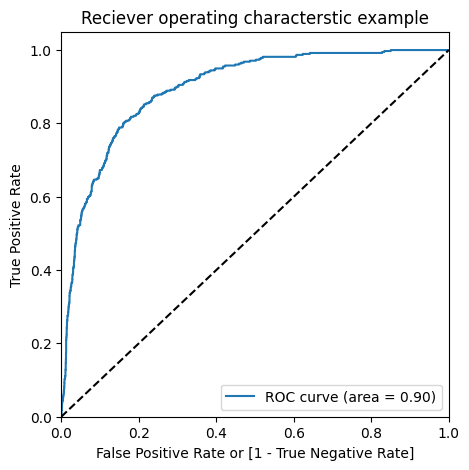

In [110]:


draw_roc(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)



In [111]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.026726,2085,0,1,0,0,0,0,0,0,0,0,0
1,0,0.023820,1239,0,1,0,0,0,0,0,0,0,0,0
2,0,0.020792,130,0,1,0,0,0,0,0,0,0,0,0
3,0,0.021455,2345,0,1,0,0,0,0,0,0,0,0,0
4,0,0.170310,1296,0,1,1,0,0,0,0,0,0,0,0


In [112]:
cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] = [i, accuracy, sensi, speci]
    
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.119785  1.000000  0.000000
0.1   0.1  0.790455  0.852243  0.782047
0.2   0.2  0.873894  0.651715  0.904129
0.3   0.3  0.900442  0.546174  0.948654
0.4   0.4  0.902023  0.422164  0.967325
0.5   0.5  0.899810  0.319261  0.978815
0.6   0.6  0.899178  0.274406  0.984201
0.7   0.7  0.892225  0.192612  0.987433
0.8   0.8  0.884640  0.110818  0.989946
0.9   0.9  0.882111  0.044855  0.996050


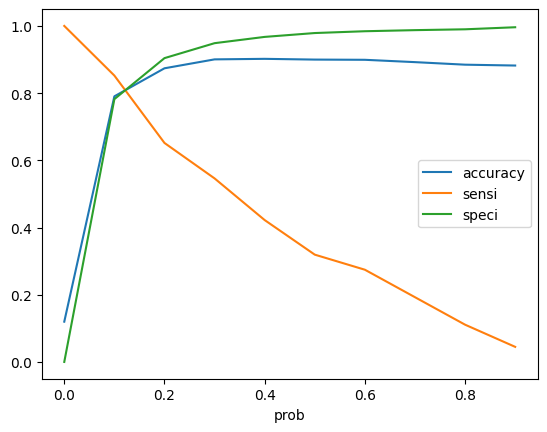

In [114]:
cutoff.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [115]:


y_train_pred_final['final_predicted'] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>0.15 else 0)
y_train_pred_final.head()



,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.026726,2085,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.023820,1239,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.020792,130,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.021455,2345,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.170310,1296,0,1,1,0,0,0,0,0,0,0,0,1


In [116]:


metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.final_predicted)



0.8542983565107459

In [117]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.final_predicted)
confusion2

array([[2418,  367],
       [  94,  285]])

In [118]:


TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives



In [119]:
TP/float(TP+FN)

np.float64(0.7519788918205804)

In [120]:
TN/float(TN+FP)

np.float64(0.8682226211849192)

In [121]:
FP/float(TN+FP)

np.float64(0.13177737881508078)

In [122]:
TP/float(TP+FP)

np.float64(0.4371165644171779)

In [123]:
TN/float(TN+ FN)

np.float64(0.9625796178343949)

In [124]:
confusion

array([[2726,   59],
       [ 258,  121]])

In [125]:
confusion2

array([[2418,  367],
       [  94,  285]])

In [126]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

np.float64(0.6722222222222223)

In [127]:


confusion[1,1]/(confusion[1,0]+confusion[1,1])



np.float64(0.31926121372031663)

In [129]:
from sklearn.metrics import precision_score

precision_score(y_train_pred_final.Sub, y_train_pred_final.predict)



0.6722222222222223

In [131]:

from sklearn.metrics import recall_score

recall_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.31926121372031663

In [132]:


y_train_pred_final.Sub, y_train_pred_final.predict



(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3159    0
 3160    0
 3161    0
 3162    0
 3163    0
 Name: Sub, Length: 3164, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3159    0
 3160    0
 3161    0
 3162    0
 3163    0
 Name: predict, Length: 3164, dtype: int64)

In [134]:

from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

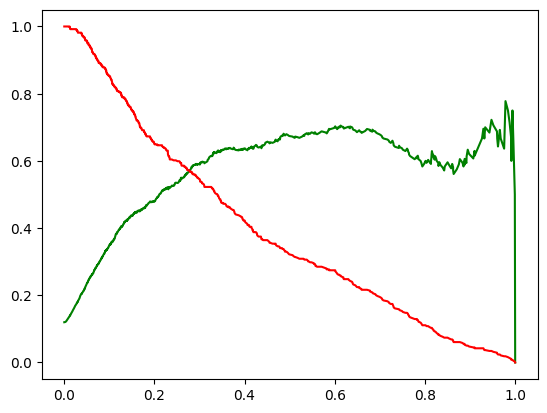

In [135]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [136]:
x_test[['age','balance','day','duration','campaign','pdays','previous']] = scaler.transform(x_test[['age','balance','day','duration','campaign','pdays','previous']])

In [137]:
x_test = x_test[col1]
x_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3731,-3.833929,-0.465435,-1.881574,-0.995320,-1.037655,-0.380467,0.575717,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2367,-3.943324,-0.465392,-1.983130,-0.988631,-0.852682,-0.396022,-0.510547,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1166,-4.016254,-0.464900,-1.838050,-0.992846,-1.037655,-0.377657,-0.148459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2973,-3.888626,-0.465421,-1.939606,-0.988251,-0.852682,-0.396022,-0.510547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2139,-3.925091,-0.465480,-2.026654,-0.994013,-1.037655,-0.396022,-0.510547,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [138]:
x_test_sm = sm.add_constant(x_test)

In [139]:
y_test_pred = res.predict(x_test_sm)

In [140]:
y_test_pred[:10]

3731    0.090571
2367    0.004786
1166    0.518277
2973    0.003574
2139    0.018174
731     0.011441
1640    0.009195
4208    0.023458
2152    0.035513
107     0.041643
dtype: float64

In [141]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [142]:
y_pred_1.head()

,0
3731,0.090571
2367,0.004786
1166,0.518277
2973,0.003574
2139,0.018174


In [143]:
y_test_df = pd.DataFrame(y_test)

In [144]:
y_test_df['Cust_id'] = y_test_df.index

In [145]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
y_pred = pd.concat([y_test_df,y_pred_1],axis=1)

In [147]:
y_pred.head()

,y,Cust_id,0
0,0,3731,0.090571
1,0,2367,0.004786
2,1,1166,0.518277
3,1,2973,0.003574
4,0,2139,0.018174


In [148]:
y_pred.rename(columns={'y':'Sub',0:'Sub_prob'},inplace=True)

In [149]:


y_pred.head()



,Sub,Cust_id,Sub_prob
0,0,3731,0.090571
1,0,2367,0.004786
2,1,1166,0.518277
3,1,2973,0.003574
4,0,2139,0.018174


In [150]:
y_pred['final_predict'] = y_pred.Sub_prob.map(lambda x: 1 if x>0.25 else 0)

In [151]:


y_pred.head()



,Sub,Cust_id,Sub_prob,final_predict
0,0,3731,0.090571,0
1,0,2367,0.004786,0
2,1,1166,0.518277,1
3,1,2973,0.003574,0
4,0,2139,0.018174,0


In [152]:
metrics.accuracy_score(y_pred.Sub, y_pred.final_predict)

0.8983050847457628

In [153]:
confusion3 = metrics.confusion_matrix(y_pred.Sub, y_pred.final_predict)
confusion3

array([[1197,   18],
       [ 120,   22]])

In [154]:


TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives



In [155]:
TP/float(TP+FN)

np.float64(0.15492957746478872)

In [156]:
TN/float(TN+FP)

np.float64(0.9851851851851852)